# Afghanistan HDI (human development indicate) model

In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
import numpy as np

## Read and visualize the data

In [2]:
df = read_csv("../../datasets/AFG_HDI.csv")

df.head()

,Year,HDI,Life Expectancy,Education Index,GNI per Capita (PPP)
0,1990,0.327,45.5,0.20,1000
1,1995,0.275,41.0,0.15,800
2,2000,0.292,43.0,0.17,900
3,2005,0.366,48.0,0.24,1200
4,2010,0.398,50.0,0.27,1400


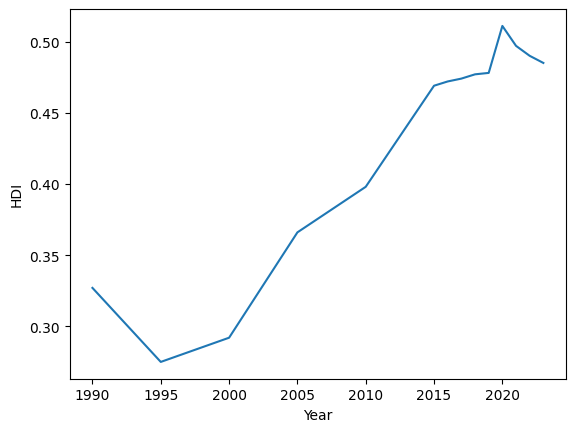

In [3]:
plt.plot(df.Year, df.HDI)
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()

In [4]:
cdf = df[['Year', 'HDI']]


## Seperating the data and creating the Model

In [5]:
msk = np.random.rand(len(df)) < 0.8

train_data = df[msk]
test_data = df[~msk]

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train_data['Year']).reshape(-1,1)
train_y = np.asanyarray(train_data['HDI'])

test_x = np.asanyarray(test_data['Year']).reshape(-1,1)
test_y = np.asanyarray(test_data['HDI'])

poly = PolynomialFeatures(degree=3)

train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 1.99000000e+03, 3.96010000e+06, 7.88059900e+09],
       [1.00000000e+00, 2.00000000e+03, 4.00000000e+06, 8.00000000e+09],
       [1.00000000e+00, 2.00500000e+03, 4.02002500e+06, 8.06015012e+09],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [1.00000000e+00, 2.01500000e+03, 4.06022500e+06, 8.18135338e+09],
       [1.00000000e+00, 2.01600000e+03, 4.06425600e+06, 8.19354010e+09],
       [1.00000000e+00, 2.01700000e+03, 4.06828900e+06, 8.20573891e+09],
       [1.00000000e+00, 2.01900000e+03, 4.07636100e+06, 8.23017286e+09],
       [1.00000000e+00, 2.02000000e+03, 4.08040000e+06, 8.24240800e+09],
       [1.00000000e+00, 2.02100000e+03, 4.08444100e+06, 8.25465526e+09],
       [1.00000000e+00, 2.02200000e+03, 4.08848400e+06, 8.26691465e+09],
       [1.00000000e+00, 2.02300000e+03, 4.09252900e+06, 8.27918617e+09]])

In [19]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
print("coef: ", clf.coef_)
print("intercept: ", clf.intercept_)

LinearRegression()
coef:  [ 0.00000000e+00 -3.20585957e+02  1.59628203e-01 -2.64933363e-05]
intercept:  214606.09403254034


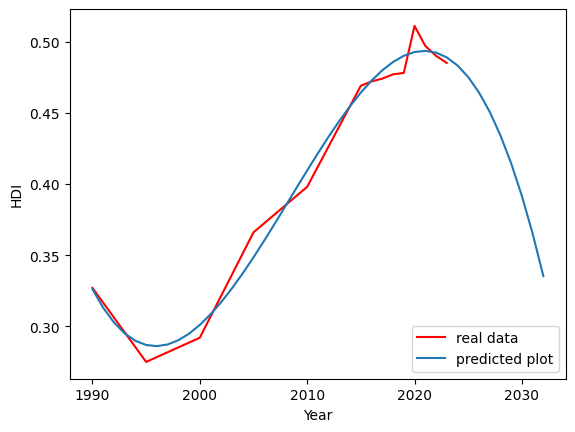

In [41]:
XX = np.arange(min(cdf['Year']), max(cdf['Year'])+10).reshape(-1,1)
yy = clf.predict(poly.transform(XX))
plt.plot(cdf.Year, cdf.HDI, color="red", label="real data")
plt.plot(XX, yy, label="predicted plot")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend(loc="lower right")
plt.show()

In [40]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

print ("r2 score: ", r2_score(test_y, test_y_))

r2 score:  0.989359094713525
